# Capstone Project : Automobile Price Prediction

### The Problem
Our target business is a French car manufacturer **Peugeot Automobiles**.  Peugeot aims to enter the Indian Market by setting up a manufacturing unit in India and are planning to launch a new car model in the near future in competition with their European and American counterparts.<br>
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Indian market, since those may be very different from the French market.<br>
The Company wants to figure out:<br>
 - Which variables significantly affect the price of a vehicle in the Indian Market
 - How well do these variables explain the price 


### About the dataset (Indian Cars dataset)
The dataset 'cars_ds_final.csv' is obtained from kaggle uploaded by Abhinav Medharkar (https://www.kaggle.com/medhekarabhinav5/indian-cars-dataset) .<br>
The dataset contains information about cars available for sale in the Indian Market and is updated 4th June 2020. It contains over 1200+ models and 140 features of these cars to study.<br><br>
Due to the sparsity of the dataset, 24 features are preselected based on the kind of questions one could expect a prospective buyer to answer so that a reasonable prediction vector can be established. The choice of features were also based on the amount of information available for the features and a common sense understanding of correlation between the variables. Variables that had very little data (<50% of the dataframe size) or would not matter to a prospective buyer were removed. There would still be quite a lot of data cleaning and features selection involved.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars_ds_final.csv', index_col=0)

In [3]:
df.rename(columns={'Ex-Showroom_Price': 'Price'}, inplace=True)

In [4]:
# The following feature list was preselected after taking an in-depth look at each available feature (total 140)
# and amount of data in each feature and common sense co-relations
feature_list = ['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain', 
                'Emission_Norm', 'Engine_Location', 'Fuel_Type', 'Body_Type',
                'ARAI_Certified_Mileage', 'Kerb_Weight', 'Ground_Clearance', 'Power', 'Torque', 'Seating_Capacity', 
                'Seats_Material', 'Type', 'Wheelbase', 'Boot_Space','Child_Safety_Locks', 'Number_of_Airbags', 
                'Infotainment_Screen']


In [5]:
# Drop the remaining features
features_drop = list(set(df.columns) - set(feature_list))
cars_df = df.drop(features_drop, axis=1)
cars_df.rename(columns={'Type': 'Transmission_Type'}, inplace=True)
cars_df.head()

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Engine_Location,Fuel_Type,Body_Type,...,Power,Torque,Seating_Capacity,Seats_Material,Transmission_Type,Wheelbase,Boot_Space,Child_Safety_Locks,Number_of_Airbags,Infotainment_Screen
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,"Rear, Transverse",Petrol,Hatchback,...,38PS@5500rpm,51Nm@4000rpm,4.0,Fabric,Manual,2230 mm,110 litres,Yes,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,"Rear, Transverse",Petrol,Hatchback,...,38PS@5500rpm,51Nm@4000rpm,4.0,Fabric,Manual,2230 mm,110 litres,Yes,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,"Rear, Transverse",CNG,Hatchback,...,38PS@5500rpm,51Nm@4000rpm,4.0,Fabric,Manual,2230 mm,110 litres,Yes,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,"Rear, Transverse",Petrol,Hatchback,...,38PS@5500rpm,51Nm@4000rpm,4.0,Fabric,Automatic,2230 mm,94 litres,Yes,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,"Rear, Transverse",Petrol,Hatchback,...,38PS@5500rpm,51Nm@4000rpm,4.0,Fabric,Manual,2230 mm,110 litres,Yes,NaN,NaN


In [6]:
# Initial look on what the data has to offer
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 23 columns):
Make                      1201 non-null object
Model                     1276 non-null object
Variant                   1276 non-null object
Price                     1276 non-null object
Displacement              1264 non-null object
Drivetrain                1269 non-null object
Emission_Norm             1265 non-null object
Engine_Location           1233 non-null object
Fuel_Type                 1276 non-null object
Body_Type                 1270 non-null object
ARAI_Certified_Mileage    1162 non-null object
Kerb_Weight               911 non-null object
Ground_Clearance          987 non-null object
Power                     1276 non-null object
Torque                    1274 non-null object
Seating_Capacity          1270 non-null float64
Seats_Material            1264 non-null object
Transmission_Type         1275 non-null object
Wheelbase                 1256 non-null object
B

## 1. Data wrangling

As we can see, there is a lot of missing data to deal with, string manipulation will be required and object dtypes need to made consistent with the type of features set.<br>
Lets first split the dataframe into identification variables, numerical variables and categorical variables. We do this because these three categories require seperate wrangling approaches.

In [8]:
id_vars = ['Make', 'Model', 'Variant']
num_vars = ['Price', 'Displacement', 'ARAI_Certified_Mileage', 'Kerb_Weight',
            'Ground_Clearance', 'Power', 'Torque', 'Seating_Capacity', 'Wheelbase', 'Boot_Space', 'Number_of_Airbags']
cat_vars = ['Drivetrain', 'Emission_Norm', 'Engine_Location', 'Fuel_Type', 'Body_Type', 
            'Seats_Material', 'Transmission_Type', 'Child_Safety_Locks', 'Infotainment_Screen']

### 1.1 Cleaning up the target variables

In [9]:
# Missing entries in car 'Make'
cars_df[cars_df['Make'].isna()]['Model'].unique()

array(['Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class',
       'Mercedes-Benz E-Class Cabriolet', 'Mercedes-Benz Gls',
       'Mercedes-Benz S-Class', 'Mercedes-Benz G-Class',
       'Mercedes-Benz Maybach', 'Mercedes-Benz S-Class Cabriolet',
       'Rolls-Royce Ghost Series Ii', 'Rolls-Royce Wraith',
       'Rolls-Royce Cullinan', 'Rolls-Royce Phantom Coupe',
       'Mercedes-Benz E-Class', 'Mercedes-Benz C-Class Cabriolet',
       'Mercedes-Benz V-Class', 'Mercedes-Benz E-Class All Terrain',
       'Mercedes-Benz Amg-Gt', 'Mercedes-Benz Amg Gt 4-Door Coupe',
       'Rolls-Royce Dawn', 'Rolls-Royce Drophead Coupe', 'Go+',
       'Mercedes-Benz A-Class', 'Mercedes-Benz C-Class',
       'Mercedes-Benz Gle', 'Mercedes-Benz Cls',
       'Mercedes-Benz Gla-Class', 'Rolls-Royce Phantom',
       'Mercedes-Benz Glc'], dtype=object)

In [10]:
# Add missing 'Make' values in Mercedes-Benz, Rolls-Royce and Datsun Models and clean up the Model entries
# Also clean up some Datsun and Land rover variants
merc_cleanup_bool = cars_df['Model'].str.contains('Mercedes-Benz')
cars_df.loc[merc_cleanup_bool, 'Make'] = 'Mercedes-Benz'
cars_df.loc[merc_cleanup_bool, 'Model'] = cars_df.loc[merc_cleanup_bool, 'Model'].str.split(n=1, expand=True)[1]

RR_cleanup_bool = cars_df['Model'].str.contains('Rolls-Royce')
cars_df.loc[RR_cleanup_bool, 'Make'] = 'Rolls-Royce'
cars_df.loc[RR_cleanup_bool, 'Model'] = cars_df.loc[RR_cleanup_bool, 'Model'].str.split(n=1, expand=True)[1]

cars_df.loc[cars_df.Model == 'Go+', 'Make'] = 'Datsun'
datsun_cleanup_bool = cars_df['Variant'].str.contains('Datsun')
cars_df.loc[datsun_cleanup_bool, 'Variant'] = cars_df.loc[datsun_cleanup_bool, 'Variant'].str.split(n=1, expand=True)[1]

cars_df.loc[cars_df['Make']=='Maruti Suzuki R', 'Model'] = 'Wagon R'
cars_df.loc[cars_df['Make']=='Maruti Suzuki R', 'Make'] = 'Maruti Suzuki'

cars_df.loc[cars_df['Make'].str.contains('Land Rover'), 'Make'] = 'Land Rover'

### 1.2 Exploring the numerical features for regularity of expression and incorrect values

In [11]:
# Exploring the numerical features for regularity of expression and incorrect values

def feat_exp_chk(df, feat_list, exp_list):
    
    # The function checks a list of columns in a dataframe against a list of regex,
    # prints out the summary and creates a dataframe of problematic entries that dont match
    
    issues_df = pd.DataFrame()
    print('Feature', '|', 'Non Null Values', '|', 'String consistent entries')
    
    for (feat, exp) in zip(feat_list, exp_list):
        # Expression to be matched against column entries
        exp_match = df[feat].str.match(exp, case=False)
        # Print match summary
        print(feat, '|', df[feat].count(), '|', exp_match.sum())
        # Create a dataframe of with information on the unmatched entries
        issues_df = issues_df.append(pd.DataFrame({'feature': feat,'entry':df.loc[exp_match == False, feat]}))
    return issues_df

In [12]:
# Check the numerical variables against string expression patterns
# We'll leave Seating_Capacity, Number_of_Airbags as they are already in float format and look good upon inspection
num_vars_chklist = [feat for feat in num_vars if feat not in ('Seating_Capacity', 'Number_of_Airbags')]

exp_chk_num = ['^Rs. \d*,\d*,\d*', '^\d{2,4} cc', '^\d+(\.\d*)? km/litre', '^\d+(\.\d*)? kg', 
                '^\d+(\.\d*)? mm', '^\d+(\.\d*)?\s?(PS|hp|bhp)', '^\d+(\.\d*)?\s?(nm)','^\d+(\.\d*)?\s?mm',
               '^\d+(\.\d*)? litres']

issues_1 = feat_exp_chk(cars_df, num_vars_chklist, exp_chk_num)

print('Numerical variables with pattern issues:', issues_1.feature.unique())

Feature | Non Null Values | String consistent entries
Price | 1276 | 1276
Displacement | 1264 | 1264
ARAI_Certified_Mileage | 1162 | 1159
Kerb_Weight | 911 | 899
Ground_Clearance | 987 | 987
Power | 1276 | 1272
Torque | 1274 | 1266
Wheelbase | 1256 | 1256
Boot_Space | 1027 | 1018
Numerical variables with pattern issues: ['ARAI_Certified_Mileage' 'Kerb_Weight' 'Power' 'Torque' 'Boot_Space']


In [13]:
# We replace the string inconsistent entries by nan and tackle them later by avergaing methods of fillna.
for feat in issues_1.feature.unique():
    cars_df.loc[issues_1[issues_1['feature']==feat].index, feat] = np.nan


Now that all the numerical variables are consistent in their representation as strings, we extract these numerical values and convert them into numeric format.

In [14]:
cars_df['Price'] = cars_df['Price'].str.replace('Rs. ', "")
cars_df['Price'] = cars_df['Price'].str.replace(',', "")

for feat in [feat for feat in num_vars_chklist if feat not in 'Price']:
    cars_df[feat] = cars_df[feat].str.extract(r'(^\d+\.?\d*)')

cars_df[num_vars_chklist] = cars_df[num_vars_chklist].apply(pd.to_numeric)
cars_df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 11 columns):
Price                     1276 non-null int64
Displacement              1264 non-null float64
ARAI_Certified_Mileage    1159 non-null float64
Kerb_Weight               899 non-null float64
Ground_Clearance          987 non-null float64
Power                     1272 non-null float64
Torque                    1266 non-null float64
Seating_Capacity          1270 non-null float64
Wheelbase                 1256 non-null float64
Boot_Space                1018 non-null float64
Number_of_Airbags         1141 non-null float64
dtypes: float64(10), int64(1)
memory usage: 159.6 KB


Now we try to fill in the missing values with average values by model.<br>
We replace the nan values in Child_Safety_Lock and Number_of_Airbags by 0 (meaning those without data are assumed to not have the feature present)

In [15]:
# We reduce some of the null values by filling the N/A's with the mean values by 'Model'
for feat in num_vars_chklist:
    cars_df[feat] = cars_df.groupby('Model')[feat].transform(lambda x: x.fillna(x.mean()))

cars_df['Number_of_Airbags'] = cars_df['Number_of_Airbags'].fillna(0)

In [16]:
# Few null values are reduced but looks like a few features are missing for entire models.
cars_df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 11 columns):
Price                     1276 non-null int64
Displacement              1264 non-null float64
ARAI_Certified_Mileage    1229 non-null float64
Kerb_Weight               977 non-null float64
Ground_Clearance          1037 non-null float64
Power                     1274 non-null float64
Torque                    1274 non-null float64
Seating_Capacity          1270 non-null float64
Wheelbase                 1268 non-null float64
Boot_Space                1076 non-null float64
Number_of_Airbags         1276 non-null float64
dtypes: float64(10), int64(1)
memory usage: 159.6 KB


Next we investigate the left over null values.<br>
These are values where all the model variants have N/A's for a particular feature in their models.<br>
 -  We tackle Kerb_Weight, Ground_Clearance, Seating_Capacity, Wheelbase and Boot_Space by averaging out by body type. These are in a way features of the body type.<br>
 -  To deal with ARAI_Certified_Mileage, we fill in the missing values using a groupby median of Body_Type and Fuel_Type and convert it into a more rubust feature for comparison- 'Cost_per_Km'. For the electric vehicles, we have to enter values manually.<br>
 -  Lastly we will fill in the missing Displacement values by interpolating through 'Power' as this will be the best method to estimate the engine displacement of the missing values.<br>

In [17]:
cars_df.Body_Type.unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe',
       'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover',
       'Sports, Convertible', 'Pick-up', 'Coupe, Convertible'],
      dtype=object)

In [18]:
# In order to use Body_type and Fuel_type for data imputation, we first need to clean them up.

cars_df['Body_Type'].replace(to_replace = ['MPV', 'Crossover', 'Coupe', 'Convertible', 'Sports, Hatchback',
                                           'Sedan, Coupe','Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover',
                                           'Sports, Convertible', 'Pick-up', 'Coupe, Convertible', 'Sports'],
                             value = ['MUV','MUV', 'Luxury', 'Luxury', 'Hatchback', 'Luxury', 'SUV', 'SUV', 'Sedan',
                                     'Luxury', 'SUV', 'Luxury', 'Luxury'], inplace=True)

cars_df['Fuel_Type'].replace(['CNG + Petrol', 'Hybrid'], 'Petrol', inplace=True)

In [19]:
# Manually filling the missing/erronous entries
# These have been identified by looking as the missing values as well as investigating the outliers

cars_df.loc[239, 'Body_Type'] = 'SUV'
cars_df.loc[843:845, 'Body_Type'] = 'Sedan'
cars_df.loc[1253:1254, 'Body_Type'] = 'Luxury'

cars_df.loc[353, 'Power'] = 563.
cars_df.loc[1204, 'Power'] = 90.

cars_df.loc[807:808, 'Torque'] = 500.
cars_df.loc[495, 'Torque'] = 171.2
cars_df.loc[1175, 'Torque'] = 113

cars_df.loc[802:804, 'Ground_Clearance'] = 204.

cars_df.loc[cars_df['Model']=='X4', 'Boot_Space'] = 525.
cars_df.loc[cars_df['Model'].str.contains('Bolero'), 'Boot_Space'] = 550.
cars_df.loc[cars_df['Model']=='Range Sport', 'Boot_Space'] = 623.

cars_df.loc[843:845, 'Number_of_Airbags'] = 7.
cars_df.loc[1166:1169, 'Number_of_Airbags'] = 6.
cars_df.loc[1046, 'Number_of_Airbags'] = 6.
cars_df.loc[cars_df['Make']=='Mini', 'Number_of_Airbags'] = 6.

# Fixing a few incorrect entries (Mercedes Benz)
cars_df.loc[cars_df['ARAI_Certified_Mileage'] > 50, 'ARAI_Certified_Mileage'] = 14.2
cars_df.loc[840, 'ARAI_Certified_Mileage'] = 31

In [20]:
# Fill NA's for the body related features by averaging out by Body_Type

for feat in ['Kerb_Weight', 'Ground_Clearance', 'Seating_Capacity', 'Wheelbase', 'Boot_Space']:
    cars_df[feat] = cars_df.groupby('Body_Type')[feat].transform(lambda x: x.fillna(x.median()))
    
cars_df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 11 columns):
Price                     1276 non-null int64
Displacement              1264 non-null float64
ARAI_Certified_Mileage    1229 non-null float64
Kerb_Weight               1276 non-null float64
Ground_Clearance          1276 non-null float64
Power                     1276 non-null float64
Torque                    1276 non-null float64
Seating_Capacity          1276 non-null float64
Wheelbase                 1276 non-null float64
Boot_Space                1276 non-null float64
Number_of_Airbags         1276 non-null float64
dtypes: float64(10), int64(1)
memory usage: 159.6 KB


Next we convert the ARAI_Certified_Mileage into Cost_per_Km which would act as a standardized feature that can be compared for all kinds of Fuel_Types (including Electric)

In [21]:
cars_df['ARAI_Certified_Mileage'] = cars_df.groupby(['Body_Type', 'Fuel_Type'])\
                                    ['ARAI_Certified_Mileage'].transform(lambda x: x.fillna(x.median()*0.85))

#We take a 15% decrement because all missing mileages are for high end models or electric (which are skipped for now)

Only electric vehicles are left without the ARAI_Certified_Mileage. To account for electric vehicles and have a common base of comparison of all fuel types, we convert this column to another feature 'Cost_per_Km' which factors in the different prices of the various fuels as well.

In [22]:
# Convert mileage in km/ltr to Cost_per_km for convinience in comparing differently fueled
# cars, including electric vehicles

cars_df['Cost_per_Km'] = ""

# Prices in delhi as on Apr 28, 2021

petrol_price = 90.4 #per ltr
diesel_price = 80.73 #per ltr
CNG_price = 43.4 #per kg

# Calculating the cost per Km
def Cost_per_Km():
    for i in cars_df.index.to_list():
        if pd.isnull(cars_df.loc[i, 'ARAI_Certified_Mileage']):
            cars_df.loc[i, 'Cost_per_Km'] = np.nan
        else:
            if cars_df.loc[i, 'Fuel_Type'] == 'Petrol':
                cars_df.loc[i, 'Cost_per_Km'] = petrol_price/cars_df.loc[i, 'ARAI_Certified_Mileage']
            elif cars_df.loc[i, 'Fuel_Type'] == 'Diesel':
                cars_df.loc[i, 'Cost_per_Km'] = diesel_price/cars_df.loc[i, 'ARAI_Certified_Mileage']
            elif cars_df.loc[i, 'Fuel_Type'] == 'CNG':
                cars_df.loc[i, 'Cost_per_Km'] = CNG_price/cars_df.loc[i, 'ARAI_Certified_Mileage']

Cost_per_Km()
cars_df['Cost_per_Km'] = cars_df['Cost_per_Km'].astype('float')

In [23]:
# Filling in the Cost_per_Km for electric vehicles
null_mileage_models = cars_df[cars_df['ARAI_Certified_Mileage'].isnull()].Model.unique().tolist()
null_mileage_models

['E2O Plus', 'Tigor Ev', 'E Verito', 'Zs Ev', 'Nexon Ev', 'Kona Electric']

In [24]:
cost_km_elec = [0.52, 0.92, 0.92, 0.80, 0.59, 0.53]

for model, cost in zip(null_mileage_models, cost_km_elec):
    cars_df.loc[cars_df['Model']==model, 'Cost_per_Km'] = cost
    
# We drop ARAI_Certified_Mileage in lieu of Cost_per_Km
cars_df.drop(columns='ARAI_Certified_Mileage', inplace=True)

# Update the numeric variables list
num_vars = ['Cost_per_Km' if feat=='ARAI_Certified_Mileage' else feat for feat in num_vars]

Next we deal with Displacement using an interpolation through Power

In [25]:
# Fill the displacement using interpolate method and fill on the nearest sorted by Power.

cars_df['Displacement'] = cars_df.sort_values('Power')['Displacement'].interpolate(method='nearest', \
                                                        limit_direction='backward').sort_index()

### 1.3 Cleaning up the Categorical variables

Lets look at the unique values present in different categorical variables

In [26]:
for feat in cat_vars:
    print(feat, '|',cars_df[feat].count(), '|',  cars_df[feat].unique())

Drivetrain | 1269 | ['RWD (Rear Wheel Drive)' 'FWD (Front Wheel Drive)'
 'AWD (All Wheel Drive)' '4WD' nan]
Emission_Norm | 1265 | ['BS IV' 'BS 6' nan 'BS III' 'BS VI']
Engine_Location | 1233 | ['Rear, Transverse' 'Front, Transverse' 'Front, Longitudinal' nan
 'Rear Mid, Transverse' 'Mid, Longitudinal' 'Mid, Transverse'
 'Rear, Longitudinal']
Fuel_Type | 1276 | ['Petrol' 'CNG' 'Diesel' 'Electric']
Body_Type | 1276 | ['Hatchback' 'MUV' 'SUV' 'Sedan' 'Luxury']
Seats_Material | 1264 | ['Fabric' 'Leather' 'Polyurethene' nan 'Vinyl']
Transmission_Type | 1275 | ['Manual' 'Automatic' 'AMT' 'CVT' 'DCT' nan]
Child_Safety_Locks | 1201 | ['Yes' nan]
Infotainment_Screen | 814 | [nan 'Touch Sensitive' 'Yes']


In [27]:
# Reducing the categories for practicalilty

cars_df['Drivetrain'].replace(to_replace = ['AWD (All Wheel Drive)', 'RWD (Rear Wheel Drive)', 
                                            'FWD (Front Wheel Drive)'], 
                              value = ['4WD', 'RWD', 'FWD'], inplace=True)
                                #Practically the same thing to the customer
cars_df['Emission_Norm'].replace(to_replace = ['BS IV', 'BS 6', 'BS III', 'BS VI'],
                                 value = ['BS_IV', 'BS_VI', 'BS_III', 'BS_VI'], inplace=True) 

cars_df['Engine_Location'].replace(to_replace = ['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal', 
                                                 'Rear Mid, Transverse', 'Mid, Longitudinal', 'Mid, Transverse', 
                                                 'Rear, Longitudinal'], 
                                   value =  ['Rear', 'Front', 'Front', 'Rear', 'Mid', 'Mid', 'Rear'], inplace=True)
                                    #Reduced to positions only, engine orientation left out
cars_df['Seats_Material'].replace(['Vinyl', 'Polyurethene'], 'Fabric', inplace=True) 
                                    #Very limited entiries in Vinyl and Polyurethene
cars_df['Transmission_Type'].replace(['AMT', 'CVT', 'DCT'], 'Automatic', inplace=True) 
                                    #Practically the same thing to the customer
cars_df['Infotainment_Screen'].replace('Touch Sensitive', 'Yes', inplace=True)

We will try to fill in the Null values for categorical variables in the following way:<br>
 - <b>Drivetrain, Emission_Norm, Engine_Location, Seats_Material, Transmission_Type : </b>By the most common value (mode) grouped by make. <br>
 - <b>Child_Safety_Locks, Infotainment_Screen :</b> NaN values will replaced by 'No'<br>

In [28]:
# Filling in the missing values for categorical variables

for feat in ['Drivetrain', 'Emission_Norm', 'Engine_Location', 'Seats_Material', 'Transmission_Type']:
    cars_df[feat] = cars_df.groupby('Make')[feat].transform(lambda x: x.fillna(x.mode()[0]))

cars_df['Child_Safety_Locks'] = cars_df['Child_Safety_Locks'].fillna('No')
cars_df['Infotainment_Screen'] = cars_df['Infotainment_Screen'].fillna('No')

In [29]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 23 columns):
Make                   1276 non-null object
Model                  1276 non-null object
Variant                1276 non-null object
Price                  1276 non-null int64
Displacement           1276 non-null float64
Drivetrain             1276 non-null object
Emission_Norm          1276 non-null object
Engine_Location        1276 non-null object
Fuel_Type              1276 non-null object
Body_Type              1276 non-null object
Kerb_Weight            1276 non-null float64
Ground_Clearance       1276 non-null float64
Power                  1276 non-null float64
Torque                 1276 non-null float64
Seating_Capacity       1276 non-null float64
Seats_Material         1276 non-null object
Transmission_Type      1276 non-null object
Wheelbase              1276 non-null float64
Boot_Space             1276 non-null float64
Child_Safety_Locks     1276 non-null object
Number

### 1.4. Treating the Outliers

In [30]:
cars_df.describe()

,Price,Displacement,Kerb_Weight,Ground_Clearance,Power,Torque,Seating_Capacity,Wheelbase,Boot_Space,Number_of_Airbags,Cost_per_Km
count,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,4.596538e+06,1858.221787,1398.757217,177.557994,156.446306,265.420790,5.263323,2629.248041,385.407412,3.435737,5.133457
std,1.214735e+07,1060.603296,459.309336,28.126329,135.633235,179.818135,1.154539,209.313380,143.845902,2.662997,2.141102
min,2.364470e+05,72.000000,660.000000,100.000000,12.000000,16.100000,2.000000,1840.000000,20.000000,0.000000,0.520000
25%,7.438760e+05,1198.000000,1030.000000,164.000000,83.000000,133.000000,5.000000,2470.000000,265.000000,2.000000,3.938049
50%,1.060064e+06,1497.000000,1228.000000,170.000000,110.000000,209.000000,5.000000,2600.000000,390.000000,2.000000,4.708333
75%,2.979828e+06,1998.000000,1725.000000,200.000000,173.000000,350.000000,5.000000,2740.000000,475.000000,6.000000,5.614907
max,2.121554e+08,7993.000000,2962.000000,307.000000,1479.000000,1600.000000,16.000000,3820.000000,1050.000000,14.000000,22.600000


Since our customer is a Mid segment car manufacturer, we can treat the high-end cars in the data base as outliers and limit our data for better prediction amongst the concerned class of cars.<br>
We limit our database to cars within the Rs. 2 Crore range.

In [31]:
cars_df = cars_df[cars_df['Price'] <= 2.0E7]

In [32]:
cars_df.describe()

,Price,Displacement,Kerb_Weight,Ground_Clearance,Power,Torque,Seating_Capacity,Wheelbase,Boot_Space,Number_of_Airbags,Cost_per_Km
count,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,2.438693e+06,1666.751450,1363.603452,178.556752,131.920867,238.731506,5.358741,2614.078293,385.696887,3.303231,4.849999
std,3.470370e+06,660.990438,432.442211,25.105199,80.049302,138.128086,1.043683,194.238331,137.095371,2.614702,1.559006
min,2.364470e+05,72.000000,660.000000,100.000000,12.000000,16.100000,2.000000,1840.000000,20.000000,0.000000,0.520000
25%,7.250000e+05,1198.000000,1018.500000,165.000000,83.000000,120.000000,5.000000,2469.000000,268.000000,2.000000,3.930435
50%,9.999000e+05,1497.000000,1225.000000,170.000000,105.000000,200.000000,5.000000,2590.000000,390.000000,2.000000,4.638276
75%,2.142000e+06,1994.000000,1725.000000,198.000000,155.000000,320.000000,5.000000,2700.000000,475.000000,6.000000,5.380952
max,1.989000e+07,6417.000000,2962.000000,307.000000,625.000000,770.000000,16.000000,3488.000000,1050.000000,14.000000,12.216216


Next we take a look at the univariate distributions of the numeric variables and remove the outliers from seemingly normal distributions using the zscore.

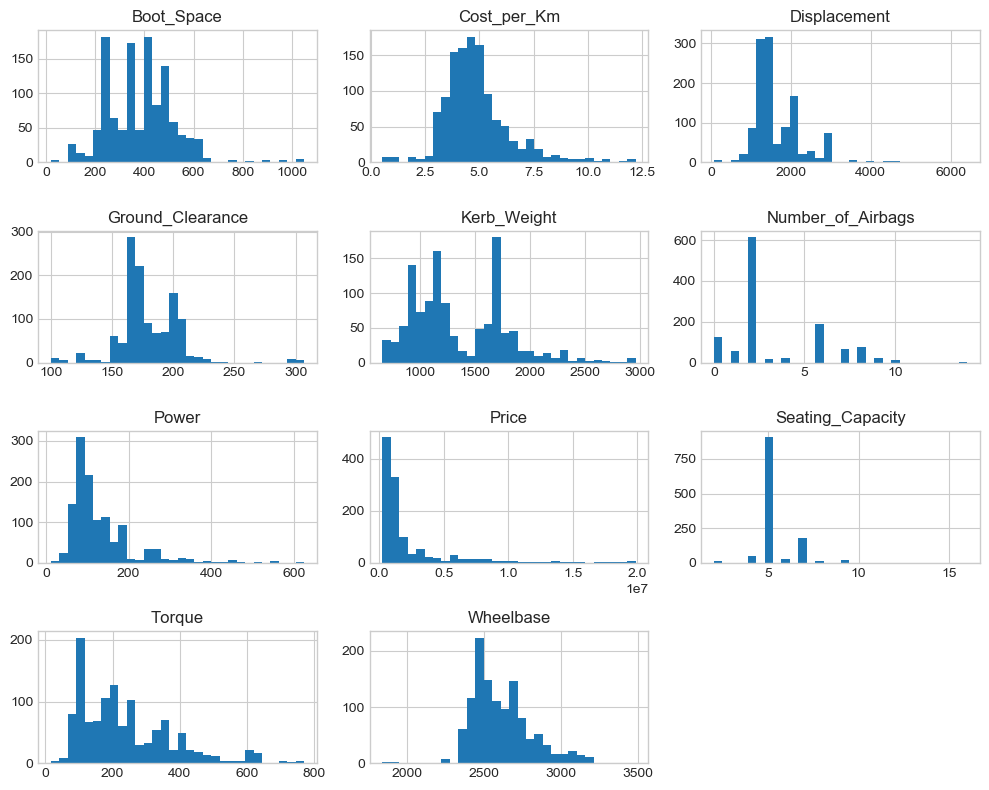

In [33]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
cars_df.hist(figsize=(10,8), bins=30)
plt.tight_layout()
plt.show()

In [34]:
from scipy import stats

In [35]:
from scipy import stats
# Since we have already limited Price, we will exclude it from the list
num_norm = [feat for feat in num_vars if feat not in ('Price', 'Number_of_Airbags', 'Seating_Capacity')]
cars_df = cars_df[(stats.zscore(cars_df[num_norm])<3).all(axis=1)]

# We manually drop the outliers from Number_of_Airbags
cars_df.drop(cars_df[cars_df['Number_of_Airbags']>10].index, inplace=True)

In [36]:
cars_df.describe()

,Price,Displacement,Kerb_Weight,Ground_Clearance,Power,Torque,Seating_Capacity,Wheelbase,Boot_Space,Number_of_Airbags,Cost_per_Km
count,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,1.784870e+06,1566.120000,1313.500000,177.476444,117.539988,218.700677,5.363556,2590.413333,374.205460,3.034667,4.641440
std,2.178190e+06,502.372188,382.943915,19.644667,54.034368,115.642577,0.953690,170.128140,118.992507,2.407663,1.256258
min,2.364470e+05,72.000000,660.000000,100.000000,12.000000,16.100000,2.000000,1840.000000,20.000000,0.000000,0.520000
25%,7.029460e+05,1198.000000,1001.000000,165.000000,83.000000,115.000000,5.000000,2460.000000,265.000000,2.000000,3.913420
50%,9.830000e+05,1493.000000,1184.000000,170.000000,100.000000,200.000000,5.000000,2555.000000,378.000000,2.000000,4.497512
75%,1.716319e+06,1968.000000,1725.000000,192.000000,141.000000,280.000000,5.000000,2688.000000,465.000000,6.000000,5.242208
max,1.650000e+07,3456.000000,2510.000000,241.000000,360.000000,620.000000,9.000000,3157.000000,759.000000,10.000000,9.397089


## 2. Exploratory Data Analysis (EDA)

Since our client is a mid segment manufacturer, we will pay closer attention to the price distribution of cars within the Rs. 50 Lakh price band during the EDA to get better insights into the market patterns and competitor psychology.<br>
The questions we will look to answer will be along the lines of:
1. How are the cars distributed relative to the 'Price' variable?
2. Can we say anything about our competitors' pricing strategy?
3. Can we observe any significant impact of the categorical predictor variables on price.
4. Can we spot any patterns of correlation between 'Price' and the numerical predictors chosen?

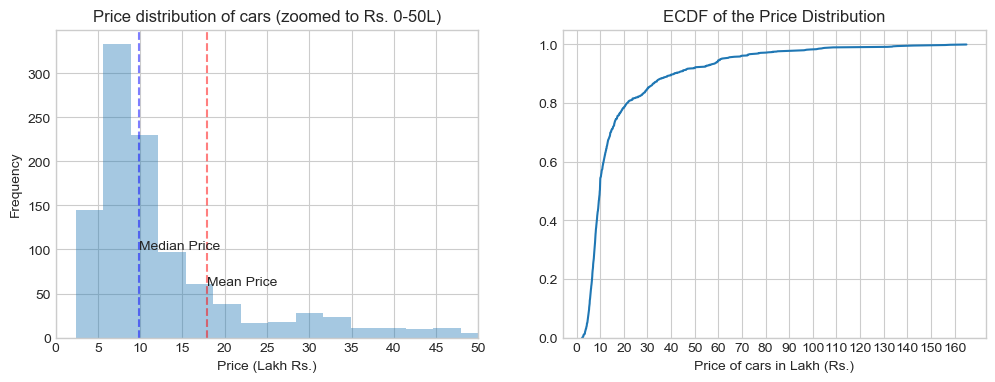

In [37]:
# Plotting the Price Distribution

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(12,4))
cars_df_50 = cars_df[cars_df['Price']< 5.0E6]
sns.distplot(cars_df['Price'], ax=ax[0], kde=0)
ax[0].axvline(cars_df['Price'].mean(), c='red', linestyle='--', alpha=0.5)
ax[0].axvline(cars_df['Price'].median(), c='blue', linestyle='--', alpha=0.5)
ax[0].set(xticks=np.arange(0, 6.0E6, 5.0E5), xticklabels=np.arange(0, 60, 5), xlabel='Price (Lakh Rs.)',
      ylabel='Frequency', title='Price distribution of cars (zoomed to Rs. 0-50L)', xlim=(0, 5.0E6))
ax[0].annotate('Median Price', (cars_df['Price'].median(), 100))
ax[0].annotate('Mean Price', (cars_df['Price'].mean(), 60))

ax[1].plot(cars_df['Price'].sort_values(), np.arange(len(cars_df))/len(cars_df))
ax[1].set(xticks=np.arange(0, 1.7e7, 1.0e6), xticklabels=np.arange(0, 180, 10), xlabel='Price of cars in Lakh (Rs.)',
         ylim=(0,1.05), title='ECDF of the Price Distribution')

plt.show()

#### Approximately 50% of the entire model range of the Indian car market falls within the Rs. 10 Lakh mark.
<b>Observations:</b><br>
 - The mean and median of the price varies significantly.<br>
 - The distribution is skewed to the Right and we see a large standard deviation across the Price distribution.<br>
 - The median of the car prices falls around the 10 Lakh range.
 - 80% of the cars fall within the Rs. 25 Lakh range

### 2.1. Exploration of Categorical Predictors

<b>Lets take a look at our competition to get a glimpse into their pricing strategy :

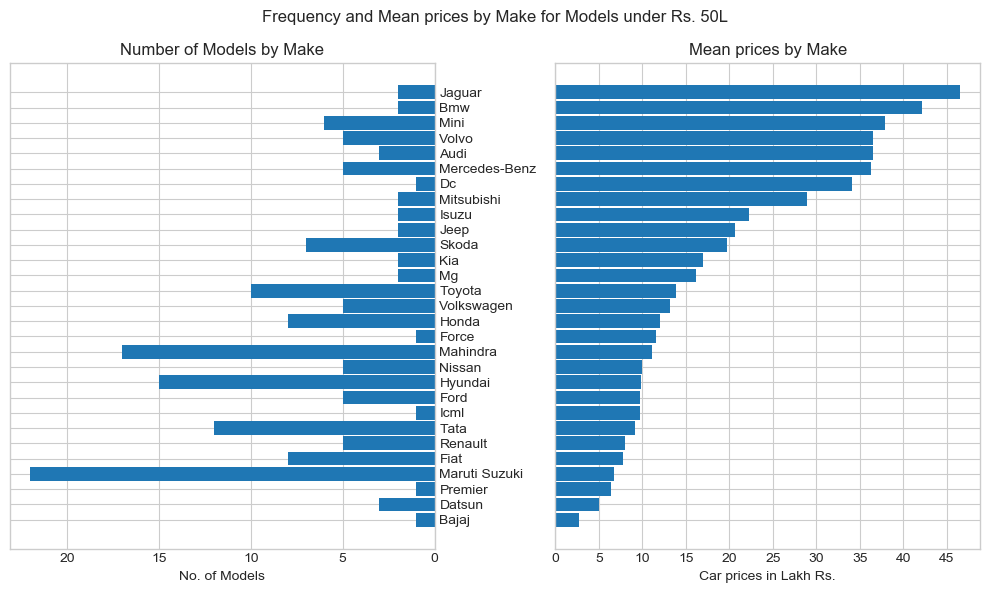

In [38]:
plt.style.use('seaborn-whitegrid')

make_price_50 = cars_df_50[['Price', 'Make']].groupby('Make').mean().sort_values(by='Price')
make_count_50 = cars_df_50[['Model', 'Make']].drop_duplicates().groupby('Make').count().reindex(make_price_50.index)

fig, ax = plt.subplots(1, 2, figsize=(10,6), sharey=True)

ax[1].barh(list(np.arange(len(make_price_50['Price']))), list(make_price_50['Price']), 
           height=0.9)
ax[0].barh(list(np.arange(len(make_count_50['Model']))), list(make_count_50['Model']), height=0.9)

ax[0].set_yticks(list(np.arange(len(make_price_50['Price']))))
ax[0].set_yticklabels(list(make_price_50.index))
ax[0].invert_xaxis()
ax[0].yaxis.tick_right()
ax[0].set(title='Number of Models by Make', xlabel='No. of Models')

ax[1].set(title='Mean prices by Make', xticks=np.arange(0,5.0E6, 5.0E5), xticklabels=np.arange(0,50,5),
         xlabel='Car prices in Lakh Rs.')
plt.suptitle('Frequency and Mean prices by Make for Models under Rs. 50L')
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()


We will throw in market share to the mix and see if any patterns emerge.

In [39]:
market_share = pd.DataFrame.from_dict({'Bajaj':0, 'Datsun':0, 'Premier':0, 'Maruti Suzuki':50, 'Fiat':0.2, 'Renault':3.3,
       'Tata':7, 'Icml':0, 'Ford':1.9, 'Hyundai':17.4, 'Nissan':0.4, 'Mahindra':5.6, 'Force':0,
       'Honda':2.9, 'Volkswagen':0.6, 'Toyota':3.1, 'Mg':1.2, 'Kia':5.8, 'Skoda':0, 'Jeep':0, 'Isuzu':0,
       'Mitsubishi':0, 'Dc':0, 'Mercedes-Benz':0, 'Audi':0, 'Volvo':0, 'Mini':0, 'Bmw':0,
       'Jaguar':0}, orient='index', dtype='float', columns=['Market Share'])

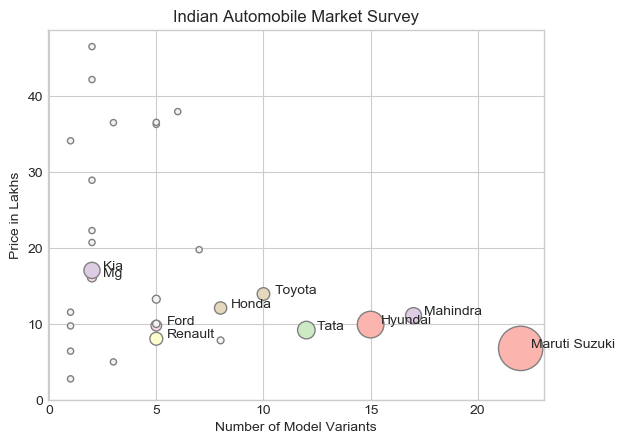

In [40]:
import matplotlib.cm as cm

ms_size = market_share.apply(lambda x: 20*(x+1**x)).to_numpy()
ms_hue = cm.Pastel1_r(market_share['Market Share'].astype('float')/market_share['Market Share'].std())
fig, ax = plt.subplots()

ax.scatter(make_count_50, make_price_50, s=ms_size, c=ms_hue, edgecolor='gray')

for i in range(len(market_share)):
    if market_share.iloc[i, 0] > 1:
        ax.annotate(list(market_share.index)[i], [make_count_50.iloc[i]+0.5, make_price_50.iloc[i]+0.1e5])
ax.set(title='Indian Automobile Market Survey', xlabel='Number of Model Variants', ylabel='Price in Lakhs',
      yticks=np.arange(0, 5e6, 1e6), yticklabels=np.arange(0, 50, 10))
plt.show()

We clearly see a pattern emerging, i.e. manufacturers placed to the right bottom on the graph tend to have more market share. Hence, we can see that the tendency of the Indian automobile buyer gravitates to lower prices and high varieties. This is where Maruti Suzuki has placed itself successfully, enjoying 50% of the market share.<br>
Tata, Mahindra and Hyundai offer nearly the same no. of models and avergage model pricing but Hyundai outperforms in Market Share.

#### A mix of pricing strategies active in the Indian Automobile Market
<b>Observations:</b><br>
We see a mix of product and pricing strategies in the Indian automobile market.<br>
 - Maruti Suzuki is the leader in low price segment (< Rs. 7 Lakhs) and offers the largest range of model choices.<br>
 - Companies like Tata, Hyundai, Mahindra compete in the mid-segment with the mean model price ranging from Rs. 7-9 Lakhs. They also offer a wide variety of models.<br>
 - As we move further up the mean pricing, we see the companies offering high end models (Rs. 25-45 Lakhs). Here the model variety is much lower than their mid segment counter parts.<br>
 
We also observe the difference between established players and unestablished/new players in the market by looking at the Number of models the manufacturer has to offer. Players like Bajaj, Premier, Kia, MG, Jeep can be seen as the new players in the market.

<b>Now let us look at some other categorical variables and how the Price varies with them :

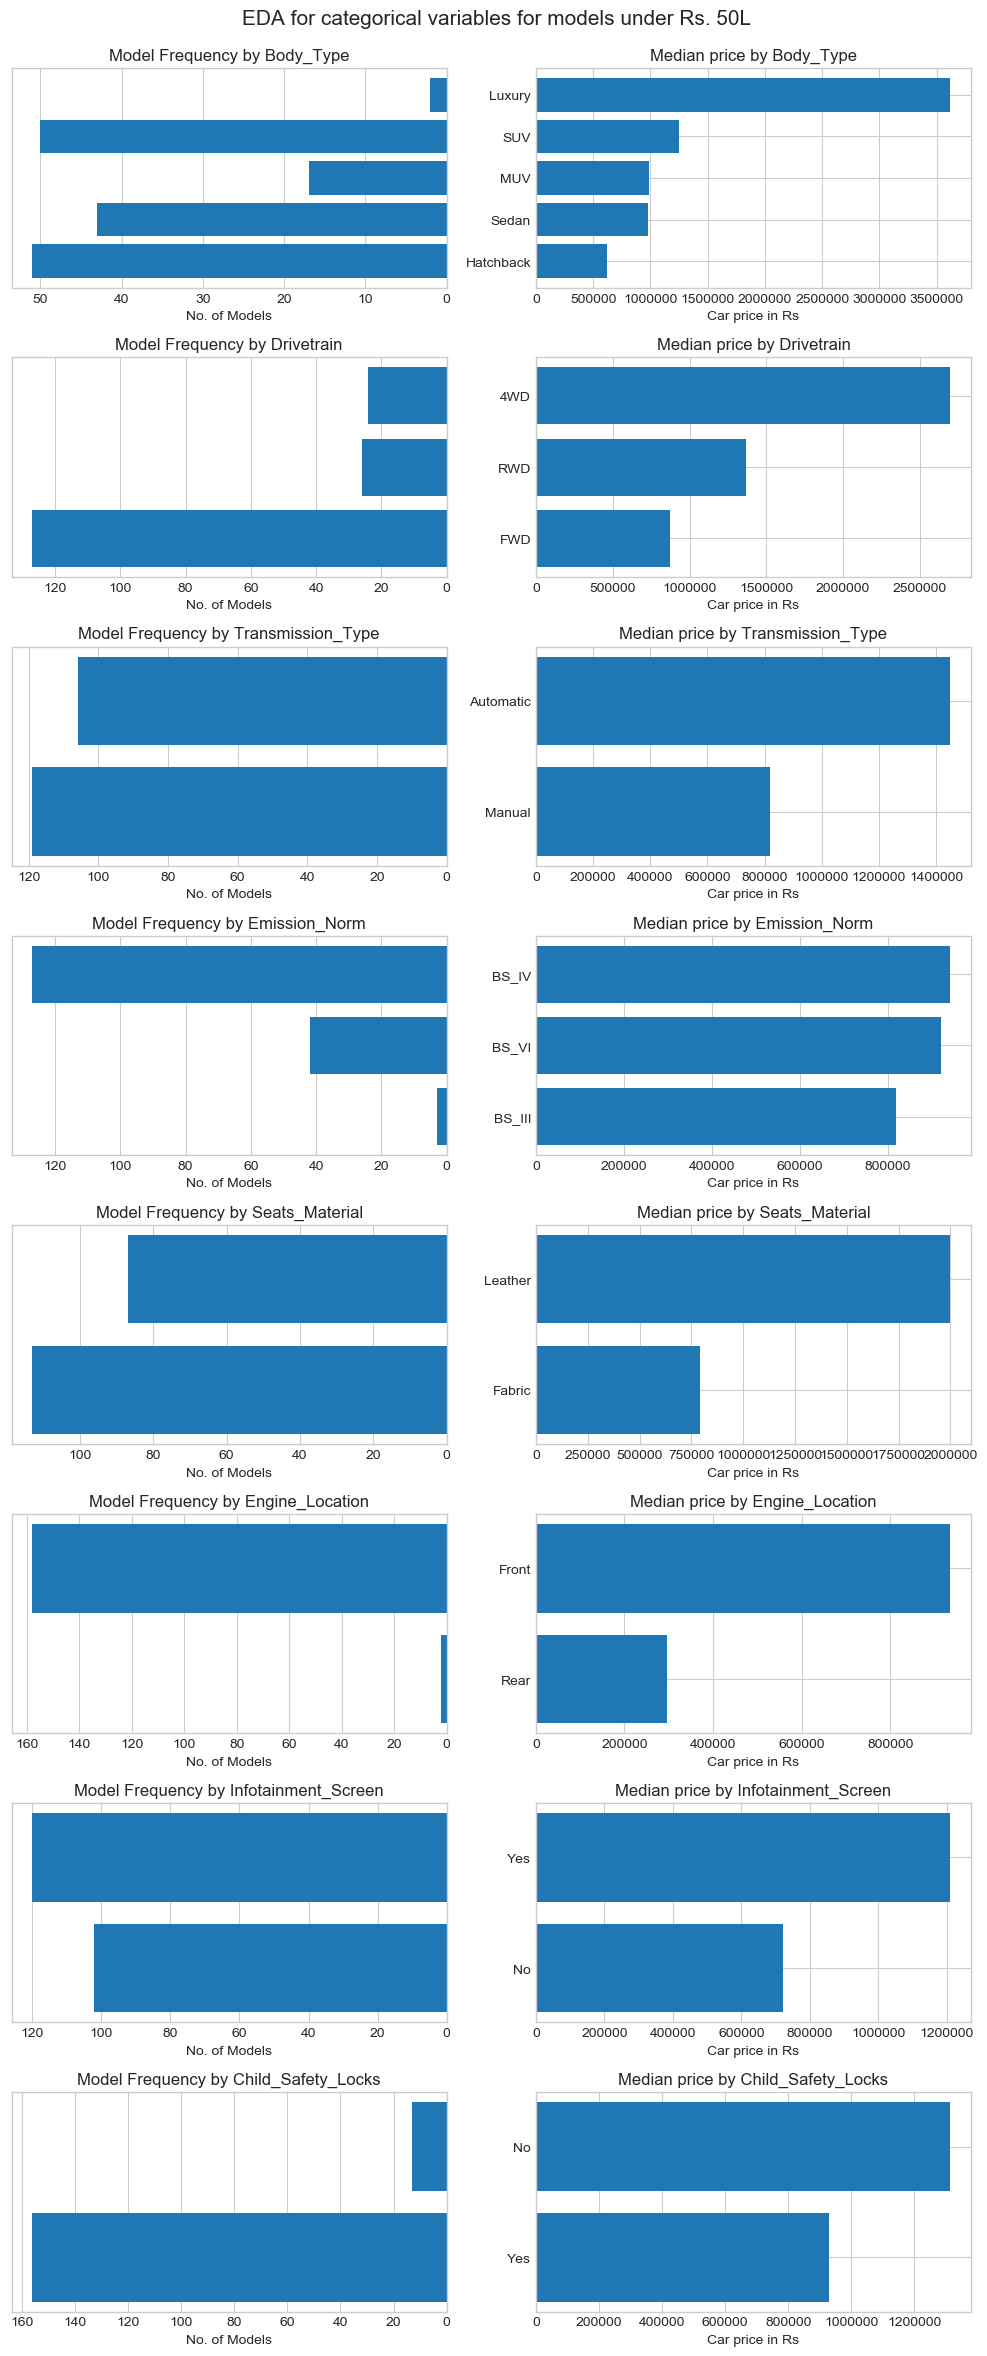

In [42]:
x = ['Body_Type', 'Drivetrain', 'Transmission_Type', 'Emission_Norm', 'Seats_Material', 'Engine_Location', 
     'Infotainment_Screen', 'Child_Safety_Locks']

fig = plt.figure(figsize=(10, 24))
for i, feat in enumerate(x):

    feat_price = cars_df_50[['Price', feat]].groupby(feat).median().sort_values(by='Price')
    feat_count = cars_df_50[['Model', feat]].drop_duplicates().groupby(feat).count().reindex(feat_price.index)
    
    sub1 = plt.subplot2grid(shape=(len(x),2), loc=(i,0))
    sub2 = plt.subplot2grid(shape=(len(x),2), loc=(i,1))
    
    sub1.barh(list(np.arange(len(feat_count))), list(feat_count['Model']))
    sub2.barh(list(np.arange(len(feat_price))), list(feat_price['Price']))
    
    sub1.set(title='Model Frequency by {}'.format(feat), xlabel='No. of Models',yticks=[], yticklabels=[])
    sub2.set(yticks=np.arange(len(feat_price)),  yticklabels=feat_price.index, 
              xlabel='Car price in Rs', title='Median price by {}'.format(feat))
    
    sub1.invert_xaxis()
    sub1.yaxis.tick_right()
    
plt.suptitle('EDA for categorical variables for models under Rs. 50L', fontsize=15)    
plt.tight_layout(rect=[0,0,1,0.97])

#### ! The SUV segment has the same depth of variety as the Hatchback segment !
 - The median price of the SUV segment is twice that of the hatchback segment.
 - Sedan is the next most competitive segment, followed by the MUV segment.

#### Models with Four wheel drive have a median price range almost double that Rear wheel drive models within the Rs. 50 Lakh range.
 - Front wheel drive is the most common drive train comprising of over 70% of the models in the Indian Market.

#### Automatic transmission models are on a rise in the Indian Market in the under Rs. 50L segment
 - The median price of car models automatic transmission is nearly 75% higher than median price of car models with manual transmission

#### Emission norm BS IV is the most popular with more that 70% of the car models adopting BS IV standards
 - Prices do not seem to be affected in any significant manner by the emission norm used.

#### Engine location doesn't have a significant impact
 - There aren't many car models with rear mounted engines but on a glance, models with engine location at the front seem to be less expensive.

#### We see that cars having infotainment screens are generally costlier than models without infotainment screens
 - Nearly twice as many models available that have screens than those which dont.

<b>Lastly we explore the Fuel Type predictor :

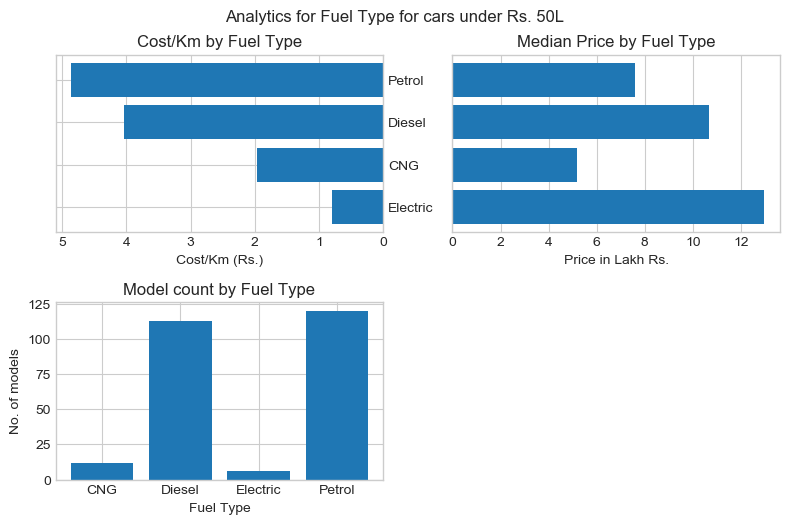

In [43]:
fig = plt.figure(figsize=(8,10))

sub1 = plt.subplot2grid(shape=(4,2), loc=(0,0), colspan=1)
sub2 = plt.subplot2grid(shape=(4,2), loc=(0,1))
sub3 = plt.subplot2grid(shape=(4,2), loc=(1,0))


Fuel_cost = cars_df_50[['Cost_per_Km', 'Fuel_Type']].groupby('Fuel_Type').median().sort_values(by='Cost_per_Km')
Fuel_price = cars_df_50[['Price', 'Fuel_Type']].groupby('Fuel_Type').median().reindex(Fuel_cost.index)
Fuel_model = cars_df_50[['Fuel_Type', 'Model']].drop_duplicates().groupby('Fuel_Type').count()                                                            

sub1.barh(np.arange(len(Fuel_cost)), Fuel_cost['Cost_per_Km'])
sub2.barh(np.arange(len(Fuel_price)), Fuel_price['Price'])
sub3.bar(np.arange(len(Fuel_model)), Fuel_model['Model'])


sub1.set(title='Cost/Km by Fuel Type', xlabel='Cost/Km (Rs.)', yticks=np.arange(len(Fuel_cost)),\
        yticklabels=Fuel_cost.index)
sub2.set(title='Median Price by Fuel Type', xlabel='Price in Lakh Rs.', xticks=np.arange(0, 14.0e5, 2e5),\
        xticklabels=np.arange(0, 14, 2), yticks=[], yticklabels=[])
sub3.set(title='Model count by Fuel Type', xticks=np.arange(len(Fuel_model)), xticklabels=Fuel_model.index,
        xlabel='Fuel Type', ylabel='No. of models')

sub1.invert_xaxis()
sub1.yaxis.tick_right()
plt.suptitle('Analytics for Fuel Type for cars under Rs. 50L')
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

#### The price of a car seems to vary with the Fuel type
 - Electric vehicles are the most economical to run while also being the costliest on average.
 - CNG also provides good running economy with the lowest median car price in the 50L range attributed to the lower segment cars on offer.
 - Maximum depth of models is found in petrol, followed by diesel (which was to be expected)

### 2.2. Exploration of Numerical Predictors

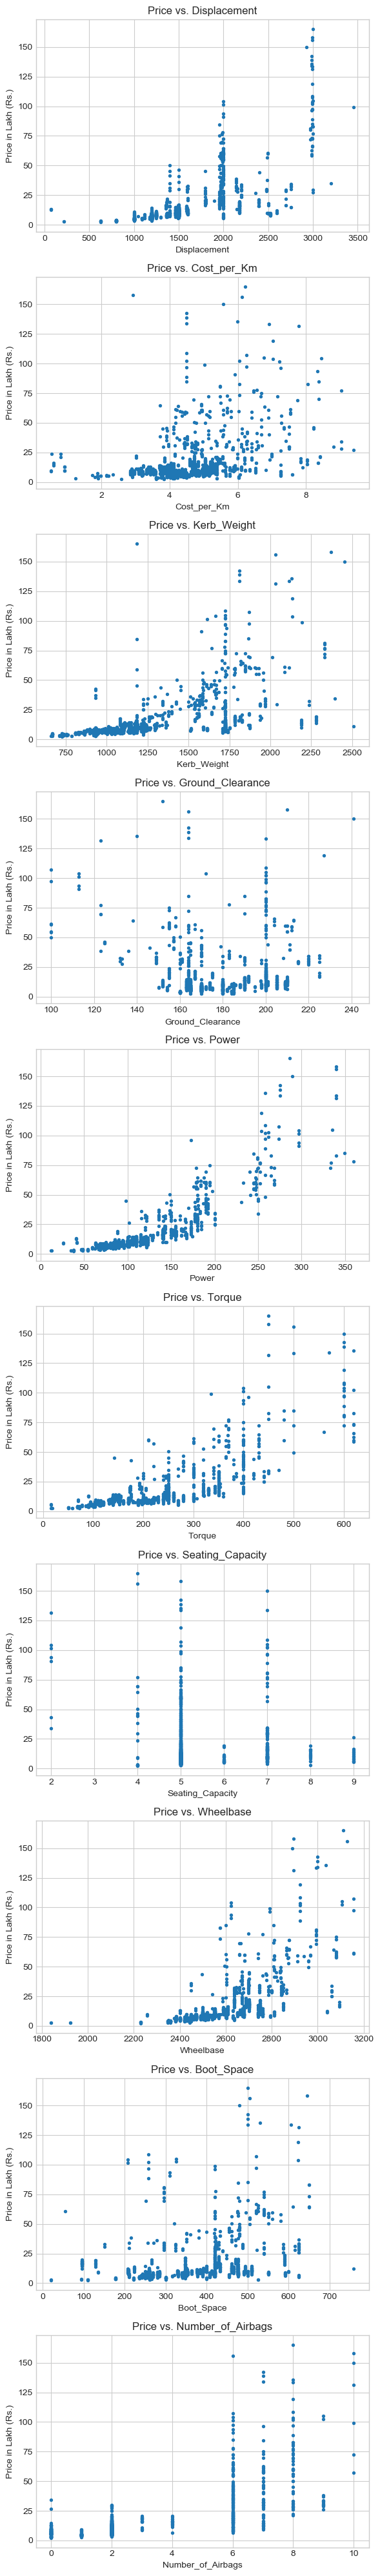

In [44]:
plot_nums = [feat for feat in num_vars if feat != 'Price']
fig, ax = plt.subplots(len(plot_nums), 1, figsize=(6, 40))

# We plot The target Price vs the rest of the numerical predictor variables

for i, feat in enumerate(plot_nums):

    ax[i].scatter(cars_df[feat], cars_df['Price'], s=8)
    ax[i].set(title='Price vs. {}'.format(feat), xlabel=feat, ylabel='Price in Lakh (Rs.)', 
              yticks=np.arange(0, 1.75E7, 0.25E7), yticklabels=np.arange(0, 175, 25))

plt.tight_layout()
plt.show()


#### The clearest trend wrt the target variable 'Price', amongst the numerical variables is seen with 'Power'.
 - Price seems to <u>non-linearly</u> vary with Power.
 - A similar trend can be observed with <b>Torque</b> and <b>Engine Displacement.</b>

Since we know that Engine displacement, Power and Torque are co-related, we will will be droping two of these three variables based on the pearson's correlation coeffiecients amongsts themselves and with the target variable 'Price'.<br>
We will also investigate these with scatter plots.

#### 'Kerb Weight' and 'Wheelbase' also show a positive trend with 'Price'.
 - This would mean that larger and heavier vehicles are generally costlier.<br>

This is to be expected to a certain degree since the more the material used in a car, the higher its price would be. Increased weight could also signal a higher 'Engine Displacement'. We will look into the relationship amongst these three variables as well.

#### 'Cost per Km' shows a slight positive correlation with 'Price'
 - This could be attributed to the affordability of the customers. 
 - Customer that buy costlier cars are not looking for high mileage but rather performance.

#### 'Number of Airbags' shows a clear positive trend with price.
 - Which is intuitive since costlier cars have greater emphasis on safety

#### 'Ground Clearance', 'Seating Capacity', 'Boot Space' show no clear trends in their scatter plots with 'Price'
 - The scatter plot is seemingly random

## 3. Feature Selection

For feature selection we will use filter based techniques: Pearsons Correlation for numerical predictors and ANOVA for categorical variables and confirm the same using dimensionality reduction (PCA).

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Seperating training and test sets

X = cars_df.drop(columns=['Make', 'Model', 'Variant', 'Price']).values
y = cars_df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_cols = cars_df.drop(columns=['Make', 'Model', 'Variant', 'Price']).columns.to_list()

### 3.1. Numerical Variables
For selecting the numerical features of interest, we take cues from the pearsons correlation coefficient heatmap to understand the features of interest.

In [47]:
train_df = pd.DataFrame(X_train, columns=X_train_cols)
train_df['Price'] = y_train

train_df[num_vars] = train_df[num_vars].apply(pd.to_numeric)

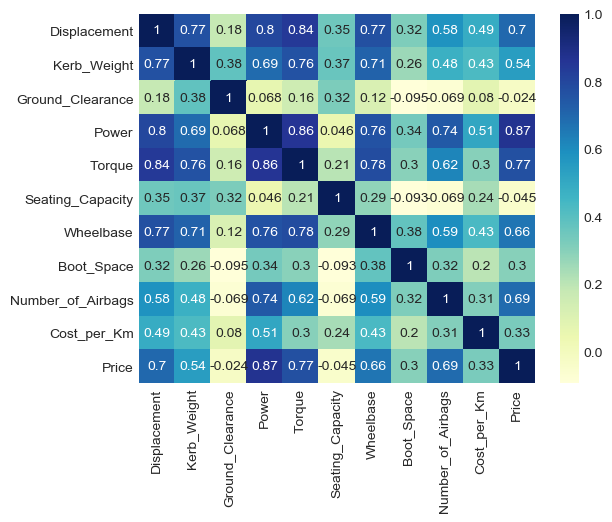

In [48]:
sns.heatmap(train_df.corr(), cmap='YlGnBu', annot=True)

Looking at the heatmap, we see multicollinearity between the predictors: 'Power', 'Displacement', 'Torque', 'Kerb Weight' and 'Wheel Base'.<br> 
'Power' has the strongest correlation with response variable 'Price'<br>
'Power' and 'Number_of_Airbags' also look correlated.<br>
Predictors 'Ground Clearance' and 'Seating Capacity' do not show any significant correlation with 'Price'.<br> 

Retaining highly correlated variables with the target variable 'Price' and removing multicollinearity, final numerical variables that we will consider for analysis are: <b>Power</b> and <b>Cost_per_Km.</b>

### 3.2. Categorical Variables

We select the most useful categorical variables for predicting 'Price' using ANOVA. We perform the ANOVA f-test for all categorical variables against the 'Price' variable and look at the F-scores and p-values to pick the most significant categorical variables.

In [49]:
from sklearn.feature_selection import f_classif

In [50]:
def f_score(y, X):
    fs, p = f_classif(y, X)
    return fs, p

def f_score_matrix(y, X_arr):
    fs = np.zeros(X_arr.shape[1])
    p = np.zeros(X_arr.shape[1])

    y = y.reshape(-1,1)
    
    for i in range(X_arr.shape[1]):
        X = X_arr[:, i]
        a, b = f_score(y, X)
        fs[i] = a[0]
        p[i] = b[0]
    
    return fs, p

fs, p = f_score_matrix(y_train, X_train[:, [train_df.columns.get_loc(feat) for feat in cat_vars]])

p-value for variable Drivetrain = 0.000000
p-value for variable Emission_Norm = 0.615583
p-value for variable Engine_Location = 0.373008
p-value for variable Fuel_Type = 0.003227
p-value for variable Body_Type = 0.000000
p-value for variable Seats_Material = 0.000000
p-value for variable Transmission_Type = 0.000000
p-value for variable Child_Safety_Locks = 0.008743
p-value for variable Infotainment_Screen = 0.000000


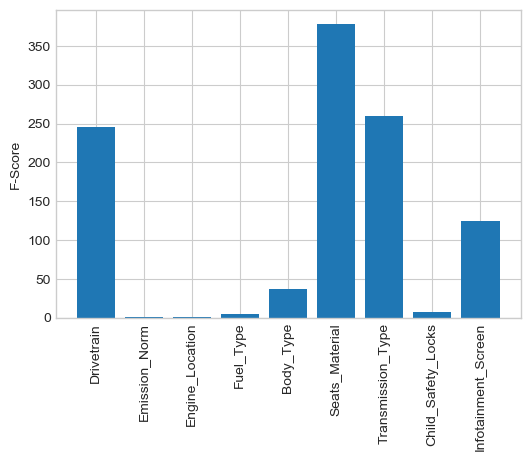

In [51]:
for val, var in zip(p, cat_vars):
    print('p-value for variable %s = %f'%(var, val))
plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(fs)), fs)
plt.xticks(np.arange(len(fs)), labels=cat_vars, rotation=90)
plt.ylabel('F-Score')
plt.show()

Looking at the F-Scores and p-values for the ANOVA tests of Categorical variables against 'Price', we retain the following variables for our linear regression model: Drivetrain, Body_Type, Seats_Material, Transmission Type. <br>

We investigate Body_Type further to see which of the body types show differences in mean prices

In [52]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(train_df['Price'],train_df['Body_Type'])
mc_results = mc.tukeyhsd()
print(mc_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1  group2    meandiff   p-adj      lower         upper     reject
------------------------------------------------------------------------
Hatchback Luxury  6876433.1846  0.001  4819804.7722  8933061.5971   True
Hatchback    MUV   542945.6981 0.3525  -264443.8902  1350335.2864  False
Hatchback    SUV  1611187.0738  0.001  1095950.0615  2126424.0861   True
Hatchback  Sedan   1357289.097  0.001   807518.3951   1907059.799   True
   Luxury    MUV -6333487.4865  0.001 -8474082.9973 -4192891.9758   True
   Luxury    SUV -5265246.1108  0.001 -7313596.7576 -3216895.4641   True
   Luxury  Sedan -5519144.0876  0.001 -7576452.7708 -3461835.4044   True
      MUV    SUV  1068241.3757  0.002   282176.5613  1854306.1901   True
      MUV  Sedan   814343.3989 0.0477     5222.5561  1623464.2418   True
      SUV  Sedan  -253897.9768 0.6449  -771843.6977   264047.7441  False
---------------------------------------------------

We see that pairs Hatchback-MUV and SUV-Sedan do not reject the null hypothesis with p-values > 0.05 telling us that these groups do not have a significant difference in mean prices. We will still retain all the categories of Body_Type since they have significant differences in between them.

The final set of predictors for our model will be:<br>
1. Power
2. Cost_per_Km
3. Drivetrain
4. Body_Type
5. Seats_Material
6. Transmission_Type

## 4. Linear Regression

### 4.1 Checking the linear assumption and refining the dataset.

In [53]:
# Preparing the dataset for linear model

train_num_vars = ['Price', 'Power', 'Cost_per_Km']

train_df1 = pd.DataFrame()
train_df1[train_num_vars] = train_df[train_num_vars]

# Converting the categorical variables into dummies
dum = pd.get_dummies(train_df[cat_vars], drop_first=True)
train_df1 = pd.concat([train_df1, dum], axis=1)

train_df1.head()

,Price,Power,Cost_per_Km,Drivetrain_FWD,Drivetrain_RWD,Emission_Norm_BS_IV,Emission_Norm_BS_VI,Engine_Location_Rear,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Body_Type_Luxury,Body_Type_MUV,Body_Type_SUV,Body_Type_Sedan,Seats_Material_Leather,Transmission_Type_Manual,Child_Safety_Locks_Yes,Infotainment_Screen_Yes
0,1328000,141.0,5.192418,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
1,526000,68.0,4.017778,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2151000,173.0,4.952761,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,1
3,524074,68.0,3.913420,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,927689,122.0,7.259892,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0


In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
formula = 'Price ~ ' + ' + '.join([col for col in train_df1.columns if col != 'Price'])

m1 = ols(formula, train_df1).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          2.10e-272
Time:                        11:40:08   Log-Likelihood:                -11957.
No. Observations:                 787   AIC:                         2.395e+04
Df Residuals:                     768   BIC:                         2.404e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

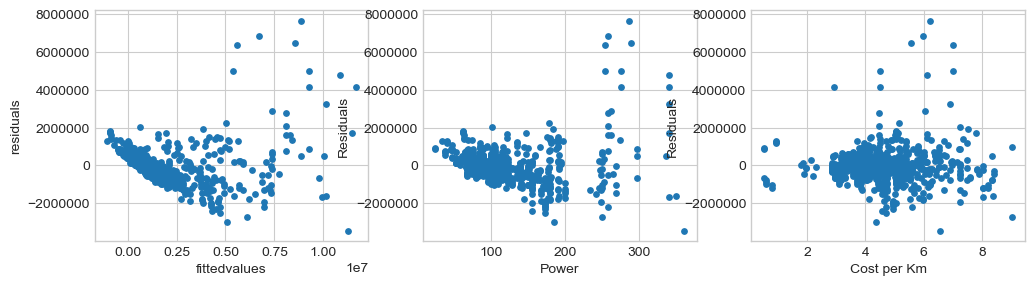

In [56]:
# Checking the residuals for homoscedasticity
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(m1.fittedvalues, m1.resid, s=15)
ax[0].set(xlabel='fittedvalues', ylabel='residuals')
ax[1].scatter(train_df['Power'], m1.resid, s=15)
ax[1].set(xlabel='Power', ylabel='Residuals')
ax[2].scatter(train_df['Cost_per_Km'], m1.resid, s=15)
ax[2].set(xlabel='Cost per Km', ylabel='Residuals')
plt.show()

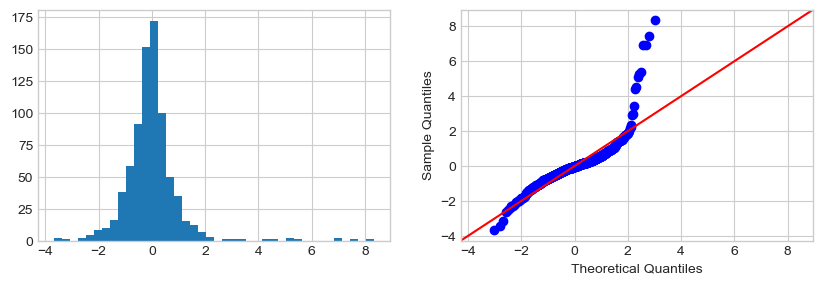

In [57]:
# Checking for normality in the residuals
inf1 = m1.get_influence().summary_frame()
st_res1 = inf1.student_resid
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].hist(st_res1, bins=40 )
ax[0].set(label='Histogram of studentized residuals')
sm.qqplot(st_res1, line='45', ax=ax[1])
ax[1].set(label='Q-Q plot of studentized residuals')
plt.show()

We can clearly see that the model is violating the assumptions of homoscedasticity and normality.<br>
To fix the issue, we try a log transform on the target variable 'Price'.

In [58]:
train_df2 = train_df1.copy()
# Log transform
train_df2['Price'] = np.log10(train_df2['Price'])

m2 = ols(formula, train_df2).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     503.1
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:40:09   Log-Likelihood:                 726.09
No. Observations:                 787   AIC:                            -1414.
Df Residuals:                     768   BIC:                            -1325.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

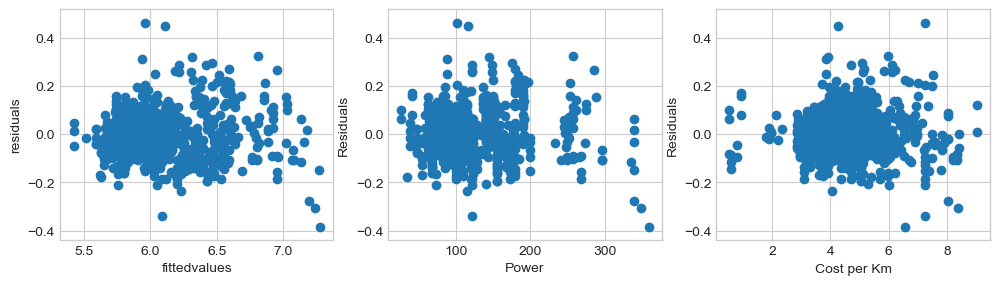

In [59]:
# Checking the residuals for homoscedasticity
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(m2.fittedvalues, m2.resid)
ax[0].set(xlabel='fittedvalues', ylabel='residuals')
ax[1].scatter(train_df['Power'], m2.resid)
ax[1].set(xlabel='Power', ylabel='Residuals')
ax[2].scatter(train_df['Cost_per_Km'], m2.resid)
ax[2].set(xlabel='Cost per Km', ylabel='Residuals')
plt.show()

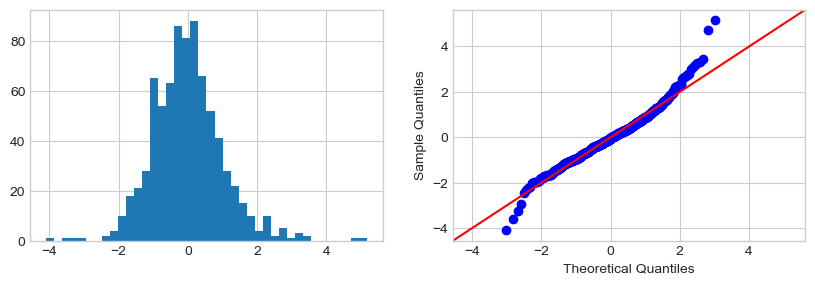

In [60]:
# Checking for normality in the residuals
inf2 = m2.get_influence().summary_frame()

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].hist(inf2.student_resid, bins=40 )
ax[0].set(label='Histogram of studentized residuals')
sm.qqplot(inf2.student_resid, line='45', ax=ax[1])
ax[1].set(label='Q-Q plot of studentized residuals')
plt.show()

We observe that our R2 has improved significantly (from 0.816 to 0.917).<br>
The F-score has also improved and the AIC has reduced, indicating a better fitted model.<br>
We see a warning for multicolinearity. We investigate that using VIF.<br>
The residuals are look normal on the histogram and the Q-Q plot thus retaining our assumptions of linearity.<br>
We do observe the effect of outliers on the residuals vs fitted_values and Q-Q plot. We investigate them as well using studentized residuals and dffits.

In [61]:
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Checking the model for multicollinearity
VIF = pd.DataFrame()
# The exog matrix with a constant
X = train_df1.drop('Price', axis=1).assign(const=1)
VIF['feature'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(VIF)

                     feature         VIF
0                      Power    3.511989
1                Cost_per_Km    3.300579
2             Drivetrain_FWD    3.522002
3             Drivetrain_RWD    2.627384
4        Emission_Norm_BS_IV   25.852962
5        Emission_Norm_BS_VI   26.478514
6       Engine_Location_Rear    1.152113
7           Fuel_Type_Diesel   21.930219
8         Fuel_Type_Electric    2.301895
9           Fuel_Type_Petrol   24.441064
10          Body_Type_Luxury    1.225413
11             Body_Type_MUV    1.365902
12             Body_Type_SUV    2.402716
13           Body_Type_Sedan    1.760783
14    Seats_Material_Leather    2.066826
15  Transmission_Type_Manual    1.548681
16    Child_Safety_Locks_Yes    1.071882
17   Infotainment_Screen_Yes    1.583200
18                     const  263.618030


We see that variables 'Emission_Norm' and 'Fuel_Type' are causing multicollinearity. We'll remove them from our final analysis.

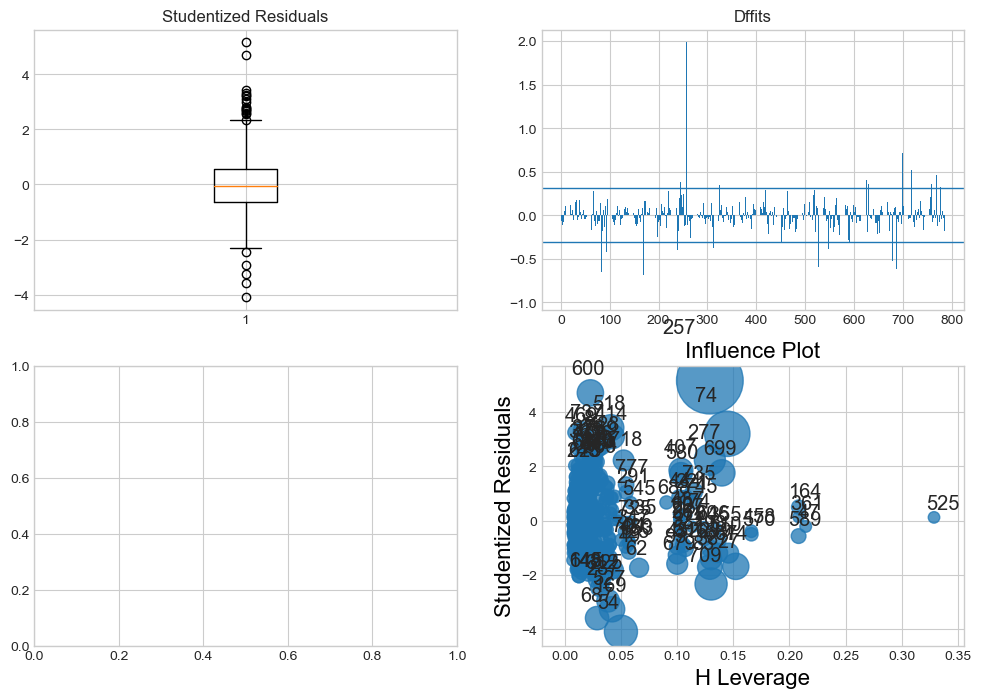

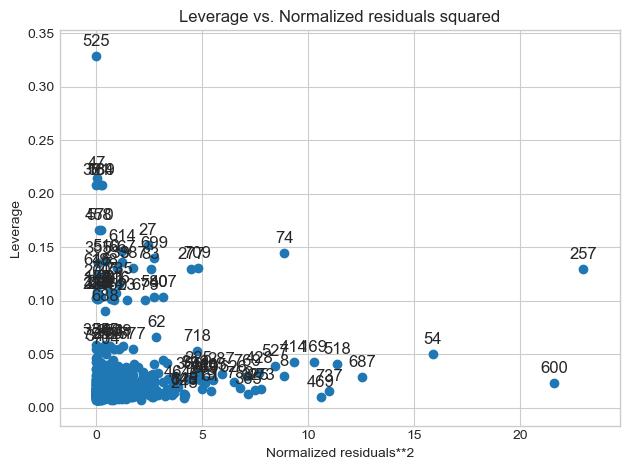

In [63]:
from statsmodels.graphics.regressionplots import *

# Lets see the influence of outliers in our model.

fig, ax = plt.subplots(2, 2, figsize=(12,8))
ax[0,0].boxplot(inf2.student_resid)
ax[0,0].set(title='Studentized Residuals')
ax[0,1].bar(range(len(inf2)), inf2.dffits)
ax[0,1].axhline(2*np.sqrt((len(train_df.columns)-1)/len(train_df)), lw=1)
ax[0,1].axhline(-2*np.sqrt((len(train_df.columns)-1)/len(train_df)), lw=1)
ax[0,1].set(title='Dffits')
plot_leverage_resid2(m2, ax=ax[1,0])
influence_plot(m2, ax=ax[1,1])
plt.tight_layout()
plt.show()

In [64]:
# Dffits based outliers
out1 = train_df[abs(inf2.dffits) > 2*np.sqrt((len(train_df.columns)-1)/len(train_df))].index.to_list()
# Student residual based outliers
out2 = train_df[abs(inf2.student_resid) > 2].index.to_list()
# Complete set
outliers = list(set(out1 + out2))

In [65]:
# Final data set
train_df3 = train_df2.copy()
train_df3 = train_df3.drop(columns=['Emission_Norm_BS_IV', 'Emission_Norm_BS_VI', 'Fuel_Type_Diesel',
                                    'Fuel_Type_Petrol'])
train_df3 = train_df3.drop(outliers)
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 786
Data columns (total 15 columns):
Price                       726 non-null float64
Power                       726 non-null float64
Cost_per_Km                 726 non-null float64
Drivetrain_FWD              726 non-null uint8
Drivetrain_RWD              726 non-null uint8
Engine_Location_Rear        726 non-null uint8
Fuel_Type_Electric          726 non-null uint8
Body_Type_Luxury            726 non-null uint8
Body_Type_MUV               726 non-null uint8
Body_Type_SUV               726 non-null uint8
Body_Type_Sedan             726 non-null uint8
Seats_Material_Leather      726 non-null uint8
Transmission_Type_Manual    726 non-null uint8
Child_Safety_Locks_Yes      726 non-null uint8
Infotainment_Screen_Yes     726 non-null uint8
dtypes: float64(3), uint8(12)
memory usage: 31.2 KB


In [66]:
formula = 'Price ~' + ' + '.join([col for col in train_df3 if col != 'Price'])

In [67]:
m3 = ols(formula, train_df3).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     680.6
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:40:15   Log-Likelihood:                 771.57
No. Observations:                 726   AIC:                            -1513.
Df Residuals:                     711   BIC:                            -1444.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

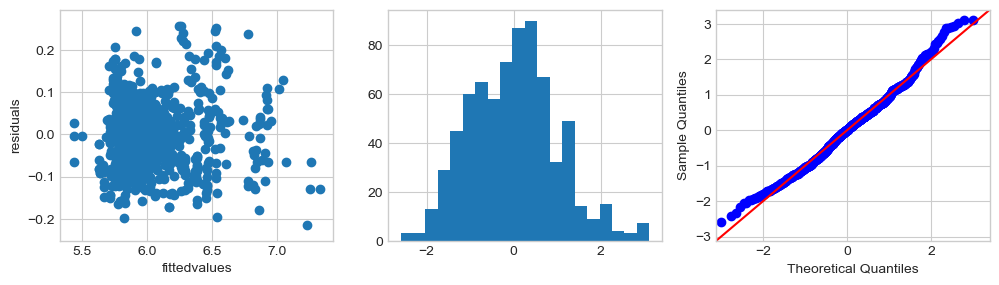

In [68]:
inf3 = m3.get_influence().summary_frame()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(m3.fittedvalues, m3.resid)
ax[0].set(xlabel='fittedvalues', ylabel='residuals')
ax[1].hist(inf3.student_resid, bins=20 )
ax[1].set(label='Histogram of studentized residuals')
sm.qqplot(inf3.student_resid, line='45', ax=ax[2])
ax[2].set(label='Q-Q plot of studentized residuals')

plt.show()

We see a much better behavious of residuals, confirming our linearity assumption.<br>
We move ahead with our linear model using this set of training data.

### 4.2 The linear model

We'll use Sklearn to build our final model and predict its accuracy. We try different linear regression methods and tune the hyperparameter alpha using GridSearchCV.<br>
We work with a standardized dataset and re-create the training and test sets using the same random state as before.

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

Recreating the final datasets in order to standardize the numerical features.<br>
We also build a copy of the dataset with the numerical features normalized in order to understand the feature importance.

In [70]:
num_data= cars_df[['Power', 'Cost_per_Km']]
cat_data = cars_df[cat_vars]

stdized_num_data = (num_data - num_data.mean())/num_data.std()
    
cat_data_dum = pd.get_dummies(cat_data, drop_first = True)
cat_data_dum = cat_data_dum.drop(columns=['Emission_Norm_BS_IV', 'Emission_Norm_BS_VI', 'Fuel_Type_Diesel', 
                                          'Fuel_Type_Petrol'])

cars_df_final = pd.concat([stdized_num_data, cat_data_dum], axis=1)

X = cars_df_final.values
y = np.log10(cars_df['Price']).values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Droping the outliers identified from influence analysis using statsmodels
X_train = pd.DataFrame(X_train).drop(outliers).values
y_train = pd.DataFrame(y_train).drop(outliers).values

In [72]:
# The four linear models to try
lm = LinearRegression
lmr = Ridge
lml = Lasso
lme = ElasticNet

In [73]:
models = {'Ridge': lmr, 'Lasso' : lml, 'ElasticNet' : lme}
alphas = {}
for name, model in models.items():
    model = model()
    search = GridSearchCV(model, {'alpha':np.arange(0.1, 1, 0.1)}, cv=5, scoring='neg_mean_squared_error')
    search.fit(X_train, y_train)
    alphas[name] = search.best_params_

alphas

{'Ridge': {'alpha': 0.30000000000000004},
 'Lasso': {'alpha': 0.1},
 'ElasticNet': {'alpha': 0.1}}

We use these alpha to fit the models and also run a plain linear regression model and look at the accuracy scores (R2) to choose the best linear regression model

Comparison of accuracy
           Model  train_R2   test_R2         MSE
0  Linear Model  0.930558   0.89769  0.00698896
1         Ridge  0.930535  0.897905   0.0069912
2         Lasso  0.769006  0.724688   0.0232482
3    ElasticNet  0.838993  0.793745   0.0162044


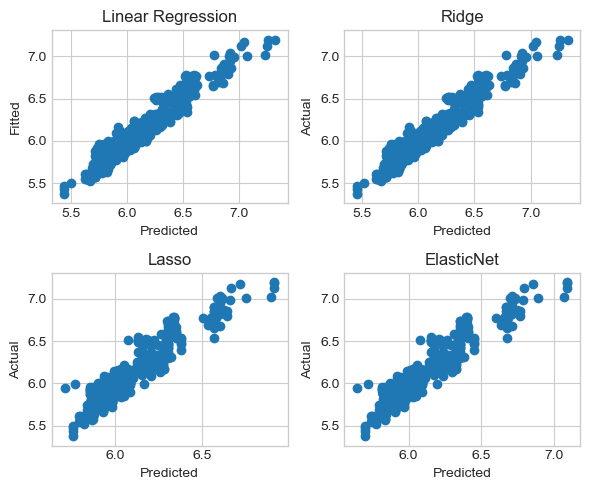

In [74]:
lm_performance_matrix = pd.DataFrame(columns=['Model', 'train_R2', 'test_R2', 'MSE'])
pred = pd.DataFrame()

lm = LinearRegression()
lm.fit(X_train, y_train)
lm_performance_matrix.loc[0, 'Model'] = 'Linear Model'
lm_performance_matrix.loc[0, 'train_R2'] = lm.score(X_train, y_train)
lm_performance_matrix.loc[0, 'test_R2'] = lm.score(X_test, y_test)
lm_performance_matrix.loc[0, 'MSE'] = mean_squared_error(y_train, lm.predict(X_train))

pred['LR'] = lm.predict(X_train).reshape(len(y_train), )

alpha = [0.3, 0.1, 0.1]
i = 0
for name, model in models.items():
    lm = model(alpha=alpha[i])
    lm.fit(X_train, y_train)
    lm_performance_matrix.loc[i+1, 'Model'] = name
    lm_performance_matrix.loc[i+1, 'train_R2'] = lm.score(X_train, y_train)
    lm_performance_matrix.loc[i+1, 'test_R2'] = lm.score(X_test, y_test)
    lm_performance_matrix.loc[i+1, 'MSE'] = mean_squared_error(y_train, lm.predict(X_train))
    pred[name] = lm.predict(X_train).reshape(len(y_train), )
    i += 1

print('Comparison of accuracy\n', lm_performance_matrix)

fig, axs = plt.subplots(2,2, figsize=(6,5))
axs = axs.flat
for i, ax in enumerate(axs):
    ax.scatter(pred.iloc[:, i], y_train)
    if i == 0:
        ax.set(title='Linear Regression', xlabel='Predicted', ylabel='Fitted')
    else:
        ax.set(title=list(models.keys())[i-1], xlabel='Predicted', ylabel='Actual')

plt.tight_layout()
plt.show()

We get the best test set accuracy (~ 90%) using the vanilla linear regression and the Ridge regression with an alpha =0.3.<br>
We continue with the Ridge regression and take a look at the coefficients to judge the feature importance.

In [75]:
# Building the final model
lm = Ridge(alpha=0.3)
lm.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = cars_df_final.columns
# To understand the magnitude of the effect of a feature, we use the absolute of the coefficients
feat_imp['Coefficient'] = abs(lm.coef_[0])
feat_imp = feat_imp.sort_values(by='Coefficient', ascending=True)

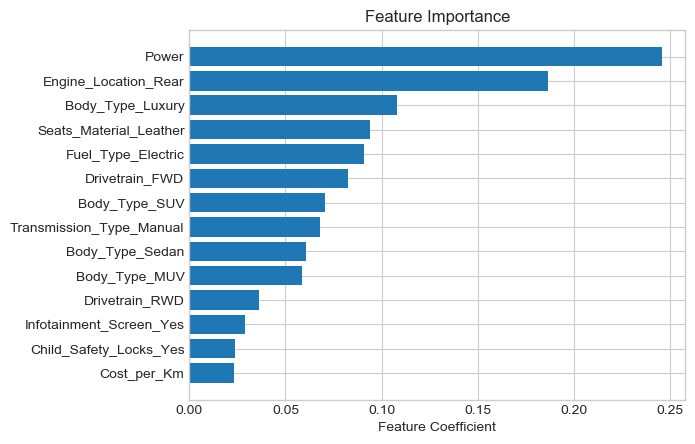

In [77]:
plt.barh(np.arange(len(feat_imp)), feat_imp.Coefficient)
plt.yticks(np.arange(len(feat_imp)), labels=feat_imp.Feature)
plt.xlabel('Feature Coefficient')
plt.title('Feature Importance')
plt.show()

As we can observe from the graph, Engine Power is the most influential factor in determining Price of the automobile.<br>
Followed by Engine Location. We do find rear mounted engines in highly expensive cars.<br>
The Luxury Body Type is 3rd most influential feature as can be expected intuitively. 

Lets test our model on few of the new models that aren't considered in this dataset:<br>
1. Hyundai Creta S - Ex-showroom Price: 12.19 Lakhs
2. Kia Sonet GTX Plus Turbo DCT DT - Ex-Showroom Price: 13.09 Lakhs
3. Nissan Magnite Turbo CVT XV - Ex-showroom Price: 8.99 Lakhs

Using these, lets see how well our model does.

In [78]:
unseen = {
    'Creta' : {'Power': 114, 'Cost_per_Km':  5.38, 'Drivetrain_FWD': 1, 'Drivetrain_RWD': 0, 'Engine_Location_Rear': 0, 
             'Fuel_Type_Electric': 0, 'Body_Type_Luxury': 0, 'Body_Type_MUV': 0, 'Body_Type_SUV': 1, 'Body_Type_Sedan': 0,
             'Seats_Material_Leather': 1, 'Transmission_Type_Manual': 1, 'Child_Safety_Locks_Yes': 1, 'Infotainment_Screen_Yes': 1},
    
    'Sonet' : {'Power': 118, 'Cost_per_Km':  4.4, 'Drivetrain_FWD': 1, 'Drivetrain_RWD': 0, 'Engine_Location_Rear': 0, 
               'Fuel_Type_Electric': 0, 'Body_Type_Luxury': 0, 'Body_Type_MUV': 0, 'Body_Type_SUV': 1, 'Body_Type_Sedan': 0,
               'Seats_Material_Leather': 0, 'Transmission_Type_Manual': 0, 'Child_Safety_Locks_Yes': 1, 'Infotainment_Screen_Yes': 1},
    
    'Magnite' : {'Power': 89, 'Cost_per_Km':  5.1, 'Drivetrain_FWD': 1, 'Drivetrain_RWD': 0, 'Engine_Location_Rear': 0, 
                 'Fuel_Type_Electric': 0, 'Body_Type_Luxury': 0, 'Body_Type_MUV': 0, 'Body_Type_SUV': 1, 'Body_Type_Sedan': 0,
                 'Seats_Material_Leather': 0, 'Transmission_Type_Manual': 0, 'Child_Safety_Locks_Yes': 1, 'Infotainment_Screen_Yes': 1}
}
actual = [1219000, 1309000, 899000]

In [79]:
new_cars = pd.DataFrame.from_dict(unseen, orient='index')

#Standardize the Power and Cost_per_Km:
new_cars['Power'] = new_cars['Power'].apply(lambda x: (x - cars_df['Power'].mean())/cars_df['Power'].std())
new_cars['Cost_per_Km'] = new_cars['Cost_per_Km'].apply(lambda x: (x - cars_df['Cost_per_Km'].mean())/cars_df['Cost_per_Km'].std())


In [80]:
new_cars.head()

,Power,Cost_per_Km,Drivetrain_FWD,Drivetrain_RWD,Engine_Location_Rear,Fuel_Type_Electric,Body_Type_Luxury,Body_Type_MUV,Body_Type_SUV,Body_Type_Sedan,Seats_Material_Leather,Transmission_Type_Manual,Child_Safety_Locks_Yes,Infotainment_Screen_Yes
Creta,-0.065514,0.587905,1,0,0,0,0,0,1,0,1,1,1,1
Sonet,0.008513,-0.192190,1,0,0,0,0,0,1,0,0,0,1,1
Magnite,-0.528182,0.365020,1,0,0,0,0,0,1,0,0,0,1,1


In [81]:
unseen_pred = (10**lm.predict(new_cars.values).reshape(3, )).tolist()
results = pd.DataFrame(actual, columns=['Actual Price (Rs.)'], index=new_cars.index)
results['Predicted Price (Rs.)'] = unseen_pred
results['Offset %'] = (results['Predicted Price (Rs.)'] - results['Actual Price (Rs.)'])*100/results['Actual Price (Rs.)']
results['Predicted Price (Rs.)'] = results['Predicted Price (Rs.)'].astype('int')
results

,Actual Price (Rs.),Predicted Price (Rs.),Offset %
Creta,1219000,1273909,4.504452
Sonet,1309000,1304528,-0.341583
Magnite,899000,934775,3.979445


As we can see, the model works well on the test data set (~90%) accuracy as well as on unseen data.<br>
Hence we can proudly hand over the model to our customer <b>Peugeot Automobiles</b> as a close estimator to the price of their new car.<br>

### Further research and improvements

We can explore new avenues and new ways to approach this problem of price estimation by including techniques like classification in our work.<br>
Due to the nature of linear regression, we have to remove quite a few outliers. Using classification, we would be better able to take into account the effect of these outlying car models and be able to identify what makes them unique.<br>
One approach to go about this could be creating classes using body_type (Hatchback, MUV, Sedan, SUV and Luxury) and binning the cars that fall into these categories by quantiles. We can then try and classify our test data set into the identified bins.<br>
This approach would not only give us a ballpark over our supposed Price Range, it will also point out directly which companies and car models we are competing against. This can be a huge leverage while launching a car in a new and competitive market like India.